In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.linear_model import LinearRegression

sns.set()
sns.color_palette("Set2")
np.random.seed(177)

In [2]:
#Get data
df = pd.read_excel("DryBeanDataset/Dry_Bean_Dataset.xlsx")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
unique_entries = set(df['Class'])
print(unique_entries)

{'BARBUNYA', 'SIRA', 'SEKER', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ'}


In [4]:
df.replace(unique_entries, np.arange(len(unique_entries)), inplace=True)
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,2
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,2
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,2
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,2
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,2


In [5]:
dataSet = df.to_numpy()
dataSet

array([[2.83950000e+04, 6.10291000e+02, 2.08178117e+02, ...,
        8.34222388e-01, 9.98723889e-01, 2.00000000e+00],
       [2.87340000e+04, 6.38018000e+02, 2.00524796e+02, ...,
        9.09850506e-01, 9.98430331e-01, 2.00000000e+00],
       [2.93800000e+04, 6.24110000e+02, 2.12826130e+02, ...,
        8.25870617e-01, 9.99066137e-01, 2.00000000e+00],
       ...,
       [4.21390000e+04, 7.59321000e+02, 2.81539928e+02, ...,
        6.76884164e-01, 9.96767264e-01, 5.00000000e+00],
       [4.21470000e+04, 7.63779000e+02, 2.83382636e+02, ...,
        6.68236684e-01, 9.95222420e-01, 5.00000000e+00],
       [4.21590000e+04, 7.72237000e+02, 2.95142741e+02, ...,
        6.16220592e-01, 9.98179623e-01, 5.00000000e+00]])

In [6]:
def dropCls(data, clas):
    
    for cl in clas:
        data = data[ data[:,-1] != cl ]

    return data


In [7]:
def HoldOut(data, shfl, clas=None):
    
    if clas:
        data = dropCls(data, clas)
        
    train, test = train_test_split(data, test_size=0.2, shuffle=shfl)
    
    model = RandomForestClassifier(max_depth=6)
    
    model.fit(train[:,:-1], train[:,-1])
    
    pred = model.predict(train[:,:-1])
    
    predTest = model.predict(test[:,:-1])
    
    print(f"Train accuracy = {accuracy_score(train[:,-1], pred)}")
    
    print(f"Test accuracy = {accuracy_score(test[:,-1], predTest)}")
    
    print("\nCounts\n")
    
    matrix_data = confusion_matrix(test[:,-1], predTest)
    
    for i in matrix_data:
        print(i)
    
    print("\nNormalized\n")
    np.set_printoptions(precision=2)
    
    matrix_data = confusion_matrix(test[:,-1], predTest, normalize='true')
    
    print(matrix_data)

    np.set_printoptions()
    
    
HoldOut(dataSet, True)

Train accuracy = 0.9086149889786921
Test accuracy = 0.8986412045538009

Counts

[200  10   2   1  43   0   2]
[  2 440   6   0   3  72   2]
[  2  14 375   0   0  11   0]
[  0   0   0 105   0   0   0]
[ 20   0   2   0 321   0   9]
[  0  36  10   0   0 651   1]
[  1  16   0   0   9   2 355]

Normalized

[[0.78 0.04 0.01 0.   0.17 0.   0.01]
 [0.   0.84 0.01 0.   0.01 0.14 0.  ]
 [0.   0.03 0.93 0.   0.   0.03 0.  ]
 [0.   0.   0.   1.   0.   0.   0.  ]
 [0.06 0.   0.01 0.   0.91 0.   0.03]
 [0.   0.05 0.01 0.   0.   0.93 0.  ]
 [0.   0.04 0.   0.   0.02 0.01 0.93]]


In [8]:
def Kfld(data, shfl, k=10, clas=None):
    
    if clas:
        data = dropCls(data, clas)
    
    folder = KFold(n_splits=k, shuffle=shfl)
    
    X, Y = data[:,:-1], data[:,-1]
    
    folder.get_n_splits(X)
    
    for train_index, test_index in folder.split(X):
        print(train_index.shape, test_index.shape)
        print(train_index[:10], test_index[:10])
    
    
Kfld(dataSet, False)

(12249,) (1362,)
[1362 1363 1364 1365 1366 1367 1368 1369 1370 1371] [0 1 2 3 4 5 6 7 8 9]
(12250,) (1361,)
[0 1 2 3 4 5 6 7 8 9] [1362 1363 1364 1365 1366 1367 1368 1369 1370 1371]
(12250,) (1361,)
[0 1 2 3 4 5 6 7 8 9] [2723 2724 2725 2726 2727 2728 2729 2730 2731 2732]
(12250,) (1361,)
[0 1 2 3 4 5 6 7 8 9] [4084 4085 4086 4087 4088 4089 4090 4091 4092 4093]
(12250,) (1361,)
[0 1 2 3 4 5 6 7 8 9] [5445 5446 5447 5448 5449 5450 5451 5452 5453 5454]
(12250,) (1361,)
[0 1 2 3 4 5 6 7 8 9] [6806 6807 6808 6809 6810 6811 6812 6813 6814 6815]
(12250,) (1361,)
[0 1 2 3 4 5 6 7 8 9] [8167 8168 8169 8170 8171 8172 8173 8174 8175 8176]
(12250,) (1361,)
[0 1 2 3 4 5 6 7 8 9] [9528 9529 9530 9531 9532 9533 9534 9535 9536 9537]
(12250,) (1361,)
[0 1 2 3 4 5 6 7 8 9] [10889 10890 10891 10892 10893 10894 10895 10896 10897 10898]
(12250,) (1361,)
[0 1 2 3 4 5 6 7 8 9] [12250 12251 12252 12253 12254 12255 12256 12257 12258 12259]


In [9]:
#shuffle data
np.random.shuffle(dataSet)

In [10]:
def LOO(data, shfl, clas=None):
    
    Kfld(data, shfl, k=data.shape[0], clas=clas)

#take limited data
LOO(dataSet[:20], False)

(19,) (1,)
[ 1  2  3  4  5  6  7  8  9 10] [0]
(19,) (1,)
[ 0  2  3  4  5  6  7  8  9 10] [1]
(19,) (1,)
[ 0  1  3  4  5  6  7  8  9 10] [2]
(19,) (1,)
[ 0  1  2  4  5  6  7  8  9 10] [3]
(19,) (1,)
[ 0  1  2  3  5  6  7  8  9 10] [4]
(19,) (1,)
[ 0  1  2  3  4  6  7  8  9 10] [5]
(19,) (1,)
[ 0  1  2  3  4  5  7  8  9 10] [6]
(19,) (1,)
[ 0  1  2  3  4  5  6  8  9 10] [7]
(19,) (1,)
[ 0  1  2  3  4  5  6  7  9 10] [8]
(19,) (1,)
[ 0  1  2  3  4  5  6  7  8 10] [9]
(19,) (1,)
[0 1 2 3 4 5 6 7 8 9] [10]
(19,) (1,)
[0 1 2 3 4 5 6 7 8 9] [11]
(19,) (1,)
[0 1 2 3 4 5 6 7 8 9] [12]
(19,) (1,)
[0 1 2 3 4 5 6 7 8 9] [13]
(19,) (1,)
[0 1 2 3 4 5 6 7 8 9] [14]
(19,) (1,)
[0 1 2 3 4 5 6 7 8 9] [15]
(19,) (1,)
[0 1 2 3 4 5 6 7 8 9] [16]
(19,) (1,)
[0 1 2 3 4 5 6 7 8 9] [17]
(19,) (1,)
[0 1 2 3 4 5 6 7 8 9] [18]
(19,) (1,)
[0 1 2 3 4 5 6 7 8 9] [19]


<AxesSubplot:>

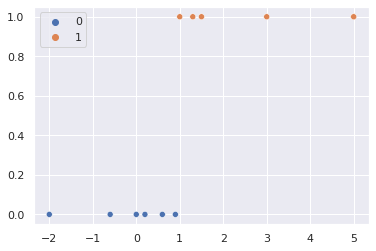

In [11]:
y_true = np.array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1])
y_pred = np.array([-0.6, 0.9, 1.3, 0.6, 5, -2, 0, 1, 1.5, 3, 0.2, 5])
sns.scatterplot(x=y_pred, y=y_true, hue=y_true)

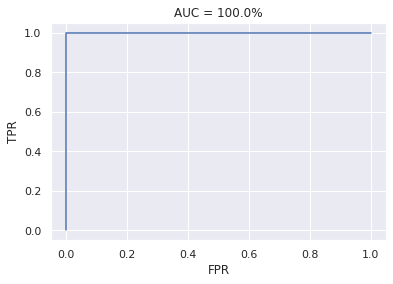

In [12]:
fpr, tpr, _ = roc_curve(y_true, y_pred)
plt.plot(fpr, tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title(f"AUC = {auc(fpr, tpr)*100}%")
plt.show()

<AxesSubplot:xlabel='Perimiter', ylabel='Area'>

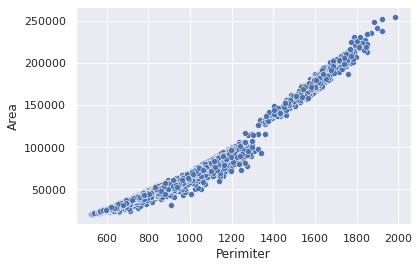

In [13]:
plt.xlabel('Perimiter')
plt.ylabel('Area')
sns.scatterplot(x=dataSet[:,1] , y=dataSet[:,0])

In [14]:
train, test = train_test_split(dataSet, test_size=0.2, shuffle=True)

In [15]:
model = LinearRegression()
model.fit(train[:,1:], train[:,0])
model.score(train[:,1:], train[:,0])

0.9999870088584959

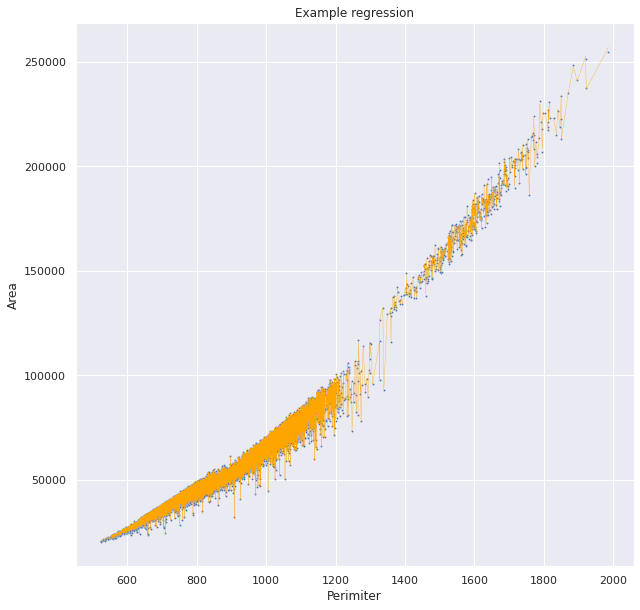

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Example regression")
plt.xlabel('Perimiter')
plt.ylabel('Area')

predicted_y = model.predict(dataSet[:,1:])
true_y = dataSet[:,0]
sns.scatterplot(x=dataSet[:,1] , y=dataSet[:,0], s=4, ax=ax)
sns.lineplot(x=dataSet[:,1] , y=predicted_y, color='orange', linewidth=0.3, ax=ax)
plt.show()

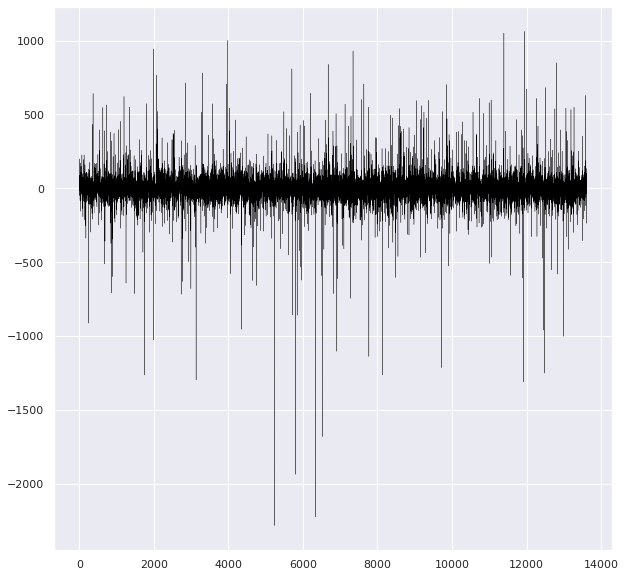

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(true_y-predicted_y, linewidth=0.3, color='black')

In [18]:
def MSE(Yt, Yp):
    
    diff = Yt - Yp
    
    squared = diff**2
    
    mse = np.mean(squared)
    
    print(f"MSE = {mse}")
    
MSE(true_y, predicted_y)

MSE = 10495.203262927425


In [19]:
def MAE(Yt, Yp):
    
    diff = Yt - Yp
    
    absolute = abs(diff)
    
    mae = np.mean(absolute)
    
    print(f"MAE = {mae}")
    
MAE(true_y, predicted_y)

MAE = 54.647710652331746
